# PCA 3D imágenes

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pythreejs as three
from IPython.display import display
import ipywidgets as widgets
import math

# 1.Grafica en 3D los datos RGB de una imagen. Un pixel tendría (x,y,R,G,B)

In [2]:
imagen = Image.open('azul.jpg')  

In [3]:
pixeles = list(imagen.getdata())
print(len(pixeles))

639940


In [4]:
pixeles=pixeles[:400000]
print(len(pixeles))


400000


In [5]:
print(pixeles[0])

(2, 119, 225)


In [6]:
r_c = [pixel[0] for pixel in pixeles]
g_c = [pixel[1] for pixel in pixeles]
b_c = [pixel[2] for pixel in pixeles]

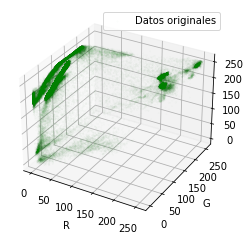

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r_c, g_c, b_c, c='green', marker='x', alpha=0.01, s=1, label='Datos originales')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.legend()
plt.show()

## 2. Calcula la matriz de covarianza 

In [8]:
def promedio(array):
    promedio = sum(array) / len(array)
    return promedio

def cov(X,Y):
    mean_X = promedio(X)
    mean_Y = promedio(Y)
    n = len(X)
    covariance = sum((X[i] - mean_X) * (Y[i] - mean_Y) for i in range(n)) / (n - 1)
    return covariance

In [9]:
matriz_covarianza=[
    [cov(r_c,r_c), cov(r_c,g_c), cov(r_c,b_c) ],
    [cov(r_c,g_c), cov(g_c,g_c), cov(b_c,g_c) ],
    [cov(r_c,b_c), cov(b_c,g_c), cov(b_c,b_c)]
]

In [10]:
#matriz_covarianza = np.cov(pixeles)
for fila in matriz_covarianza:
    print(fila)

[2747.61517579423, 1427.346367714829, -194.83398671216364]
[1427.346367714829, 1737.1590487411968, 631.896617125491]
[-194.83398671216364, 631.896617125491, 978.9508029373801]


## 3. Calcula la matriz de correlación

In [11]:
matriz_correlacion = np.corrcoef(pixeles, rowvar=False)

In [12]:
print(matriz_correlacion)

[[ 1.          0.65332854 -0.11879723]
 [ 0.65332854  1.          0.48455804]
 [-0.11879723  0.48455804  1.        ]]


## 4. Calcula los 3 eigenvalores y 3 eigenvectores

In [13]:
eigenvalores, eigenvectores = np.linalg.eig(matriz_covarianza)

In [14]:
print("Eigenvalores:")
print(eigenvalores)

print("\nEigenvectores:")
print(eigenvectores)

Eigenvalores:
[3772.38574706 1483.39584523  207.94343518]

Eigenvectores:
[[-0.80490574 -0.42498737  0.41414065]
 [-0.5883911   0.48108244 -0.64988891]
 [-0.07695878  0.76677599  0.6372848 ]]


## 4. Imprimir qué proporción de la varianza de los datos explica cada eigenvalor

In [15]:
suma_total_eigenvalores = np.sum(eigenvalores)
proporcion_varianza = eigenvalores / suma_total_eigenvalores
#print(sum(proporcion_varianza_explicada))

for i, prop in enumerate(proporcion_varianza):
    print(f"Eigenvector {i + 1}: {prop:.4f}")


Eigenvector 1: 0.6904
Eigenvector 2: 0.2715
Eigenvector 3: 0.0381


## 5. Graficar el centro o valor medio

In [16]:
vector_prom = [promedio(r_c), promedio(g_c), promedio(b_c)]
print(vector_prom)
r,g,b=vector_prom

[17.098885, 104.47834, 212.5880025]


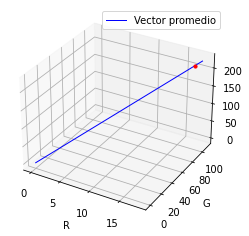

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([0, r*1.05 ], [0, g*1.05 ], [0, b*1.05 ], c='blue', linestyle='-', linewidth=1, label='Vector promedio')
ax.scatter(r,g,b, s=10, c='red')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.legend()
plt.show()

## 6. Graficar los ejes principales

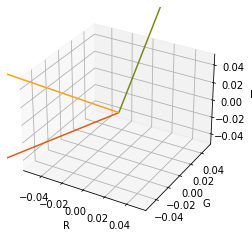

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
origen = np.zeros(3)
for eigenvector, color in zip(eigenvectores, ['#F6A21E', '#E55B13', '#7A871E']):
    ax.quiver(*origen, *eigenvector, color=color)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()


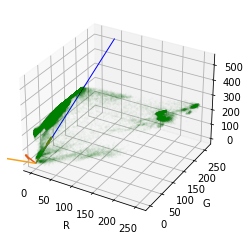

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
origen = np.zeros(3)
for eigenvector, color in zip(eigenvectores, ['#F6A21E', '#E55B13', '#7A871E']):
    ax.quiver(*origen, *eigenvector*100, color=color, label='Eigenvector {eigenvector}')
ax.scatter(r_c, g_c, b_c, c='green', marker='x', alpha=0.01, s=1, label='Datos originales')
ax.plot([0, r * 2.5], [0, g * 2.5], [0, b * 2.5], c='blue', linestyle='-', linewidth=1, label='Vector promedio')

# Configuración del gráfico
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()